In [1]:
import pandas as pd
import os
import itertools
import numpy

# Open and read the stock file provided
csv_files_directory = "C:\\Users\\batuh\\Desktop\\all_data"

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(csv_files_directory) if file.endswith('.csv')]

# Initialize an empty list to store individual DataFrames
dfs = []

# Iterate through each CSV file and read its data into a DataFrame
for file in csv_files:
    # Construct the full path to the CSV file
    file_path = os.path.join(csv_files_directory, file)

    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate the list of DataFrames into a single DataFrame
combined_data = pd.concat(dfs, ignore_index=True)

# Convert the 'timestamp' column to datetime
combined_data['timestamp'] = pd.to_datetime(combined_data['timestamp'])

# Get unique company names from the "short_name" column
unique_companies = combined_data['short_name'].unique()

# Create a dictionary to store DataFrames for each unique company
company_dataframes = {}

# Iterate through unique company names and create a DataFrame for each
for company in unique_companies:
    company_dataframes[company] = combined_data[combined_data['short_name'] == company].reset_index(drop=True)

print(company_dataframes)


{'THYAO':                       timestamp   price short_name
0     2018-01-02 09:00:00+03:00   15.79      THYAO
1     2018-01-02 10:00:00+03:00   16.01      THYAO
2     2018-01-02 11:00:00+03:00   16.05      THYAO
3     2018-01-02 12:00:00+03:00   16.05      THYAO
4     2018-01-02 13:00:00+03:00   16.06      THYAO
...                         ...     ...        ...
12404 2022-12-23 14:00:00+03:00  142.00      THYAO
12405 2022-12-23 15:00:00+03:00  142.10      THYAO
12406 2022-12-23 16:00:00+03:00  141.00      THYAO
12407 2022-12-23 17:00:00+03:00  141.90      THYAO
12408 2022-12-23 18:00:00+03:00  141.80      THYAO

[12409 rows x 3 columns], 'AKBNK':                       timestamp    price short_name
0     2018-01-02 09:00:00+03:00   6.9475      AKBNK
1     2018-01-02 10:00:00+03:00   7.0602      AKBNK
2     2018-01-02 11:00:00+03:00   7.0954      AKBNK
3     2018-01-02 12:00:00+03:00   7.0814      AKBNK
4     2018-01-02 13:00:00+03:00   7.1024      AKBNK
...                         ..

In [4]:
garan_prices = company_dataframes['GARAN']['price']
akbnk_prices = company_dataframes['AKBNK']['price']
diff_garan_akbnk= garan_prices-akbnk_prices
diff_garan_akbnk


0        2.2572
1        2.2555
2        2.2460
3        2.2428
4        2.2304
          ...  
12404    9.7627
12405    9.8063
12406    9.6370
12407    9.7865
12408    9.7956
Name: price, Length: 12409, dtype: float64

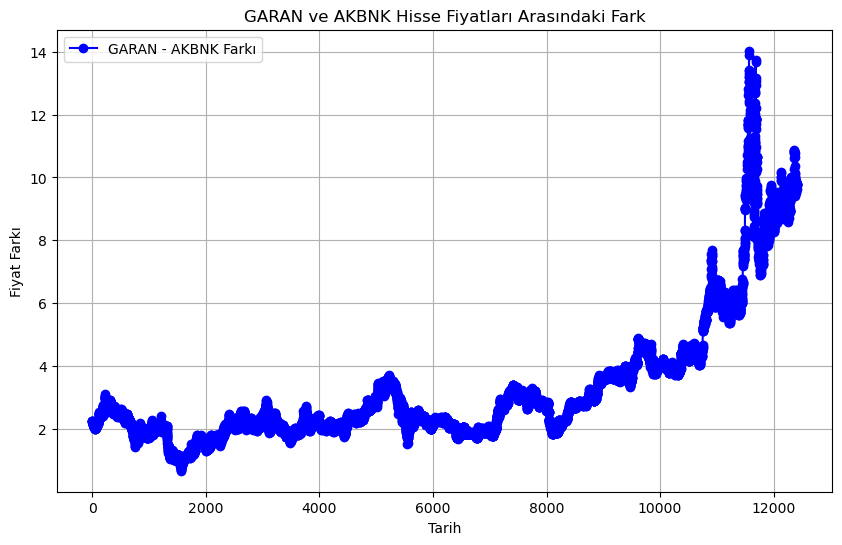

In [5]:
import matplotlib.pyplot as plt

# diff_garan_akbnk'yi çizgi grafiği ile görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(diff_garan_akbnk.index, diff_garan_akbnk.values, label='GARAN - AKBNK Farkı', color='blue', marker='o')
plt.title('GARAN ve AKBNK Hisse Fiyatları Arasındaki Fark')
plt.xlabel('Tarih')
plt.ylabel('Fiyat Farkı')
plt.legend()
plt.grid(True)
plt.show()


ADF Statistic: -0.02595359050309158
p-value: 0.9563323863751498


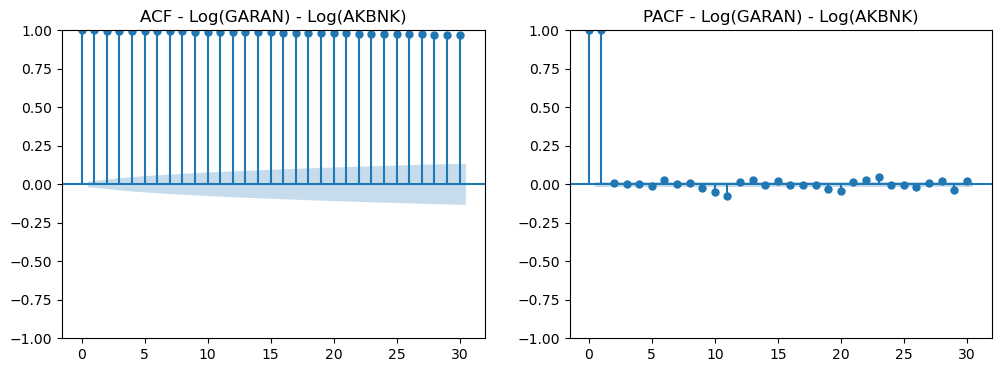

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Veriye ADF testi uygula
result = adfuller(diff_garan_akbnk.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# ACF ve PACF grafiklerini çiz
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(diff_garan_akbnk.dropna(), lags=30, ax=ax[0])
ax[0].set_title('ACF - (GARAN) - (AKBNK)')

plot_pacf(diff_garan_akbnk.dropna(), lags=30, ax=ax[1])
ax[1].set_title('PACF - (GARAN) - (AKBNK)')

plt.show()


ADF Statistic (First Diff): -20.533136285376084
p-value (First Diff): 0.0


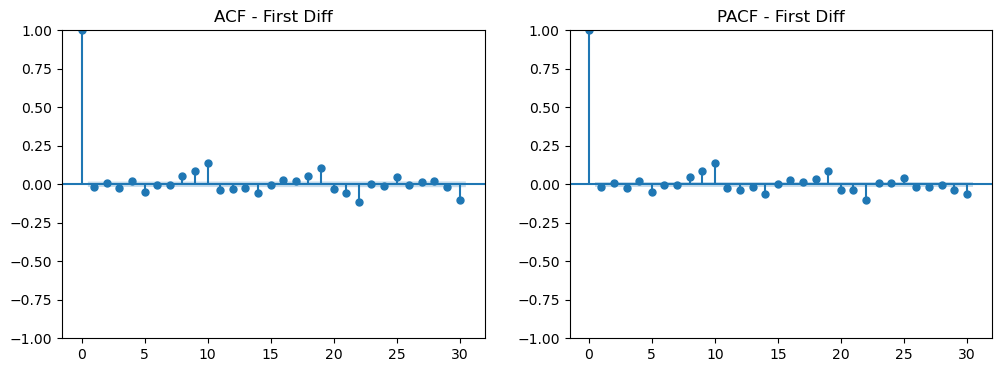

ACF Değerleri:
[ 1.         -0.01553957  0.00910836 -0.02718299  0.02412026 -0.04862321
 -0.00449204 -0.00606368  0.05318854  0.08441309  0.13805872 -0.03412229
 -0.03216461 -0.02361076 -0.05759596 -0.00782853  0.03061885  0.02321247
  0.05584029  0.10475129 -0.02799852 -0.05386343 -0.11348619  0.00205311
 -0.01123398  0.04628674 -0.00380693  0.01607138  0.02376512 -0.02067237
 -0.10054052]

PACF Değerleri:
[ 1.         -0.01554083  0.00887045 -0.02692001  0.02324462 -0.04753952
 -0.00699928 -0.00422172  0.05025096  0.08847008  0.13982362 -0.02742313
 -0.03502918 -0.01885329 -0.06033043  0.00360749  0.03079656  0.01335948
  0.03745042  0.08580605 -0.03785668 -0.04045211 -0.10182451  0.00539071
  0.01101429  0.03867116 -0.015326   -0.01592388 -0.00271116 -0.03934126
 -0.06625861]


In [8]:
# İlk farkı al
first_diff = diff_garan_akbnk.diff().dropna()

# ADF testi uygula
result_first_diff = adfuller(first_diff)
print('ADF Statistic (First Diff):', result_first_diff[0])
print('p-value (First Diff):', result_first_diff[1])

# ACF ve PACF grafiklerini çiz
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(first_diff, lags=30, ax=ax[0])
ax[0].set_title('ACF - First Diff')

plot_pacf(first_diff, lags=30, ax=ax[1])
ax[1].set_title('PACF - First Diff')

plt.show()

from statsmodels.tsa.stattools import acf, pacf

# ACF ve PACF hesapla
acf_values, confint_acf = acf(first_diff, nlags=30, alpha=0.05)
pacf_values, confint_pacf = pacf(first_diff, nlags=30, alpha=0.05)

# ACF ve PACF değerlerini yazdır
print("ACF Değerleri:")
print(acf_values)
print("\nPACF Değerleri:")
print(pacf_values)






In [10]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA modelini kur
model = ARIMA(diff_garan_akbnk, order=(1, 1, 1))
fit_model = model.fit()

# Modelin özelliklerini yazdır
print(fit_model.summary())


c:\Users\batuh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\batuh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                12409
Model:                 ARIMA(1, 1, 1)   Log Likelihood               16047.388
Date:                Mon, 11 Dec 2023   AIC                         -32088.776
Time:                        19:45:19   BIC                         -32066.498
Sample:                             0   HQIC                        -32081.315
                              - 12409                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0077      0.187     -0.041      0.967      -0.374       0.359
ma.L1         -0.0077      0.187     -0.041      0.967      -0.374       0.359
sigma2         0.0044   7.97e-06    553.195      0.0

c:\Users\batuh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA modelini kur
model = ARIMA(diff_garan_akbnk, order=(1, 1, 3))
fit_model = model.fit()

# Modelin özelliklerini yazdır
print(fit_model.summary())


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                12409
Model:                 ARIMA(1, 1, 3)   Log Likelihood               16066.903
Date:                Mon, 11 Dec 2023   AIC                         -32123.805
Time:                        19:56:15   BIC                         -32086.675
Sample:                             0   HQIC                        -32111.370
                              - 12409                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8253      0.014    -59.284      0.000      -0.853      -0.798
ma.L1          0.8132      0.014     58.845      0.000       0.786       0.840
ma.L2         -0.0043      0.004     -1.206      0.2

In [21]:
import statsmodels.tsa.arima.model 
# ARIMA(1,1,4) modelini kur
model_arima_114 = ARIMA(diff_garan_akbnk, order=(1, 1, 4))
fit_model_arima_114 = model_arima_112.fit()
fit_model_arima_114.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                12409
Model:                 ARIMA(1, 1, 4)   Log Likelihood               16052.374
Date:                Mon, 11 Dec 2023   AIC                         -32092.749
Time:                        19:55:17   BIC                         -32048.192
Sample:                             0   HQIC                        -32077.827
                              - 12409                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5779      0.258      2.241      0.025       0.072       1.083
ma.L1         -0.5917      0.258     -2.290      0.022      -1.098      -0.085
ma.L2          0.0136      0.005      2.703      0.007       0.004       0.023
ma.L3         -0.0305      0.004     -8.516      0.000      -0.038      -0.023
ma.L4          0.0218      0.006      3.407      0.001       0.009       0.034
sigma2         0.0044   8.89e-06    495.218      0.000       0.004       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):           5299565.49
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               9.33   Skew:                            -0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                       104.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

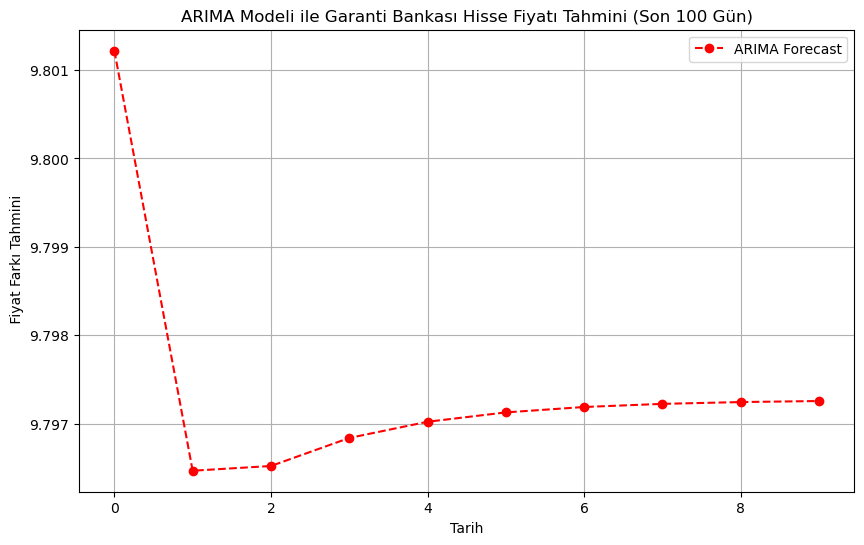

In [44]:
import matplotlib.pyplot as plt

# Tahmin adımlarını belirle
forecast_steps = 10

# Başlangıç verisinin sonunu al
last_data_point = diff_garan_akbnk.index[-1]

# last_data_point'i datetime türünde bir nesneye dönüştür
last_data_point = pd.to_datetime(last_data_point)

# Tahmin adımlarını kullanarak yeni tahminler yap
forecast_values = []
for step in range(1, forecast_steps + 1):
    new_forecast = fit_model.get_forecast(steps=step).predicted_mean.iloc[-1]
    forecast_values.append(new_forecast)

# Tahmin değerlerini çizgi grafiği ile görselleştir
plt.figure(figsize=(10, 6))
plt.plot( forecast_values, label='ARIMA Forecast', color='red', linestyle='dashed', marker='o')
plt.title('ARIMA Modeli ile Garanti Bankası Hisse Fiyatı Tahmini (Son 100 Gün)')
plt.xlabel('Tarih')
plt.ylabel(' Fiyat Farkı Tahmini')
plt.legend()
plt.grid(True)
plt.show()


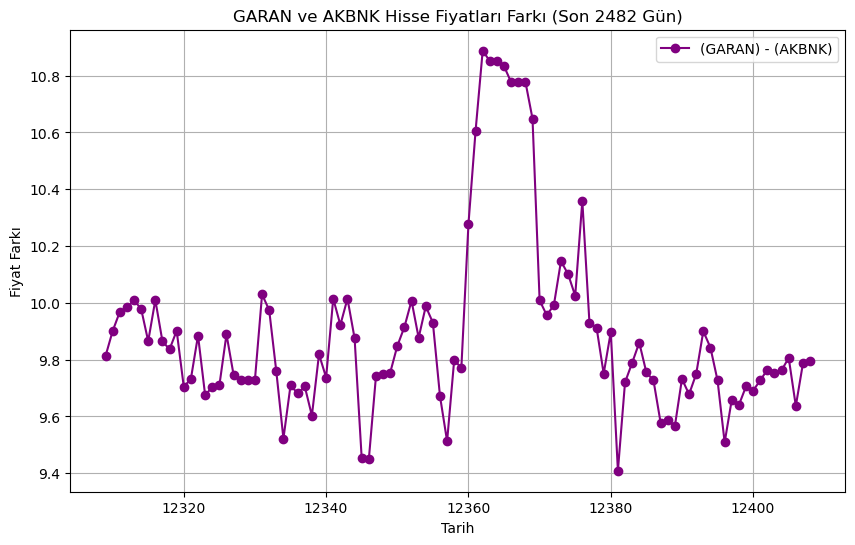

In [37]:
# farkları çizgi grafiği ile görselleştir
plt.figure(figsize=(10, 6))
plt.plot(diff_garan_akbnk.index[-forecast_steps:], diff_garan_akbnk.values[-forecast_steps:], label='(GARAN) - (AKBNK)', color='purple', marker='o')
plt.title('GARAN ve AKBNK Hisse Fiyatları Farkı (Son 2482 Gün)')
plt.xlabel('Tarih')
plt.ylabel('Fiyat Farkı')
plt.legend()
plt.grid(True)
plt.show()
